# Analysis pipeline for Gating

## Preliminaries

In [1]:
%cd ~/code/textrec/

/Users/kcarnold/code/textrec


In [2]:
%matplotlib inline
import datetime
import json
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import toolz
from IPython.display import Image, HTML

In [3]:
from textrec.paths import paths
from textrec import analysis_util, util, notebook_util, automated_analyses
reload(analysis_util), reload(util), reload(notebook_util), reload(automated_analyses)
from textrec.notebook_util import images, id2img, id2url, show_images

Loading COCO captions
Loading COCO id2url
Done


/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Loading ONMT models...
coco_lm_adam_acc_46.00_ppl_16.32_e10_nooptim.pt
Loading model parameters.
coco_cap_adam_acc_48.73_ppl_12.56_e10_nooptim.pt
Loading model parameters.
Ready.
Loading SpaCy...done
Loading COCO captions
Loading COCO id2url
Done
Loading SpaCy...done


In [4]:
# HTML(show_images([images_by_split['val'][0]['cocoid']]))

## Load results of writing experiment

Prerequisites: Run `textrec.logs_to_csv {batch_name}` and `textrec.gruntwork {batch_name}`.

In [46]:
batch = 'gc1'
experiment_level_data = pd.read_csv(paths.analyzed / f'experiment_{batch}.csv')
block_level_data = pd.read_csv(paths.analyzed / f'block_{batch}.csv')
trial_level_data = pd.read_csv(paths.analyzed / f'trial_withmanual_{batch}.csv')
helpful_ranks_by_condition = pd.read_csv(paths.analyzed / f'helpful_ranks_by_condition_{batch}.csv')

In [47]:
helpful_ranks_by_condition.set_index('index')

,accurate-least-condition,accurate-most-condition,quick-least-condition,quick-most-condition,specific-least-condition,specific-most-condition
index,,,,,,
always,0,14,0,14,0,13
gated,2,3,2,3,0,4
norecs,15,0,15,0,17,0


In [48]:
HTML("Each of {num_participants} participants ({non_male} non-male) completed {num_trials_per} trials per experiment, for a total of {n_trials} trials.".format(
    num_participants=len(set(trial_level_data.participant)),
    non_male=(experiment_level_data.gender == 'Male').sum(),
    num_trials_per=trial_level_data.groupby('participant').size().mean(),
    n_trials=len(trial_level_data)))

In [49]:
HTML("Participants spent {total_time_mean:.1f} +- {total_time_std:.1f} minutes total.".format(
    total_time_mean=experiment_level_data.total_time.mean(),
    total_time_std=experiment_level_data.total_time.std()))

In [50]:
def summarize_means(df, by, outcome):
    return ', '.join(f'{name}={group_mean:.2f}' for name, group_mean in df.groupby(by)[outcome].mean().iteritems())

In [51]:
trial_level_data['num_words'] = trial_level_data.text.apply(lambda x: len(x.split()))
trial_level_data['num_recs_full_total'] = trial_level_data['num_recs_full_gated'] + trial_level_data['num_recs_full_seen']

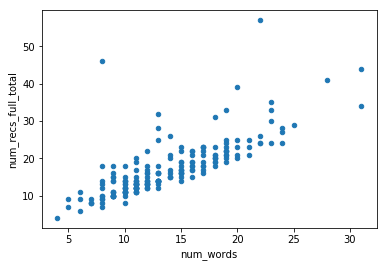

In [52]:
trial_level_data.plot.scatter(x='num_words', y='num_recs_full_total')

In [54]:
trial_level_data.iloc[3]

participant                                                                        26f62q
age                                                                                    33
english_proficiency                                                   Native or bilingual
gender                                                                               Male
helpfulRank-accurate-least-condition                                               norecs
helpfulRank-accurate-least-idx                                                          0
helpfulRank-accurate-most-condition                                                always
helpfulRank-accurate-most-idx                                                           2
helpfulRank-quick-least-condition                                                  norecs
helpfulRank-quick-least-idx                                                             0
helpfulRank-quick-most-condition                                                   always
helpfulRan

In [75]:
trial_level_data['frac_visible_full'] = trial_level_data['num_recs_full_seen'] / trial_level_data['num_recs_full_total']
# trial_level_data['frac_visible_any'] = trial_level_data['num_re']

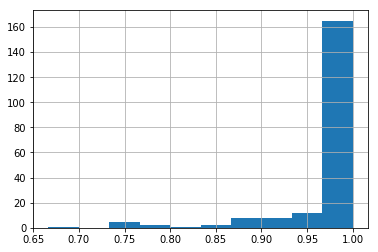

In [76]:
trial_level_data.frac_visible_full.hist()

In [84]:
analysis = analysis_util.get_log_analysis('26f62q')

________________________________________________________________________________
[Memory] Calling textrec.analysis_util.get_log_analysis_raw...
get_log_analysis_raw('/Users/kcarnold/code/textrec/logs/26f62q.jsonl', 1037403, git_rev='f57aaec', analysis_files={ 'analyze.js': 'f24414e722aeef392360f4da123b36705f6895e0',
  'run-analysis': '11083c5f51c5c469297e930142323920f09fe548',
  'src/Analyzer.js': 'aacc7b0e5849eb7639139c099a9aa77f5ff5a5f1'})


AnalysisException: Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
Assertion failed
TypeError: Cannot read property 'sofar' of undefined
    at /Users/kcarnold/code/textrec/src/frontend/src/Analyzer.js:199:30
    at Array.forEach (<anonymous>)
    at processLogGivenState (/Users/kcarnold/code/textrec/src/frontend/src/Analyzer.js:39:7)
    at _callee3$ (/Users/kcarnold/code/textrec/src/frontend/src/Analyzer.js:340:12)
    at tryCatch (/Users/kcarnold/code/textrec/src/frontend/node_modules/babel-runtime/node_modules/regenerator-runtime/runtime.js:62:40)
    at Generator.invoke [as _invoke] (/Users/kcarnold/code/textrec/src/frontend/node_modules/babel-runtime/node_modules/regenerator-runtime/runtime.js:296:22)
    at Generator.prototype.(anonymous function) [as next] (/Users/kcarnold/code/textrec/src/frontend/node_modules/babel-runtime/node_modules/regenerator-runtime/runtime.js:114:21)
    at step (/Users/kcarnold/code/textrec/src/frontend/src/Analyzer.js:129:191)
    at /Users/kcarnold/code/textrec/src/frontend/src/Analyzer.js:129:361
    at process._tickCallback (internal/process/next_tick.js:68:7) 'TypeError: Cannot read property \'sofar\' of undefined\n    at /Users/kcarnold/code/textrec/src/frontend/src/Analyzer.js:199:30\n    at Array.forEach (<anonymous>)\n    at processLogGivenState (/Users/kcarnold/code/textrec/src/frontend/src/Analyzer.js:39:7)\n    at _callee3$ (/Users/kcarnold/code/textrec/src/frontend/src/Analyzer.js:340:12)\n    at tryCatch (/Users/kcarnold/code/textrec/src/frontend/node_modules/babel-runtime/node_modules/regenerator-runtime/runtime.js:62:40)\n    at Generator.invoke [as _invoke] (/Users/kcarnold/code/textrec/src/frontend/node_modules/babel-runtime/node_modules/regenerator-runtime/runtime.js:296:22)\n    at Generator.prototype.(anonymous function) [as next] (/Users/kcarnold/code/textrec/src/frontend/node_modules/babel-runtime/node_modules/regenerator-runtime/runtime.js:114:21)\n    at step (/Users/kcarnold/code/textrec/src/frontend/src/Analyzer.js:129:191)\n    at /Users/kcarnold/code/textrec/src/frontend/src/Analyzer.js:129:361\n    at process._tickCallback (internal/process/next_tick.js:68:7)'
TypeError: Cannot read property 'sofar' of undefined
    at /Users/kcarnold/code/textrec/src/frontend/src/Analyzer.js:199:30
    at Array.forEach (<anonymous>)
    at processLogGivenState (/Users/kcarnold/code/textrec/src/frontend/src/Analyzer.js:39:7)
    at _callee3$ (/Users/kcarnold/code/textrec/src/frontend/src/Analyzer.js:340:12)
    at tryCatch (/Users/kcarnold/code/textrec/src/frontend/node_modules/babel-runtime/node_modules/regenerator-runtime/runtime.js:62:40)
    at Generator.invoke [as _invoke] (/Users/kcarnold/code/textrec/src/frontend/node_modules/babel-runtime/node_modules/regenerator-runtime/runtime.js:296:22)
    at Generator.prototype.(anonymous function) [as next] (/Users/kcarnold/code/textrec/src/frontend/node_modules/babel-runtime/node_modules/regenerator-runtime/runtime.js:114:21)
    at step (/Users/kcarnold/code/textrec/src/frontend/src/Analyzer.js:129:191)
    at /Users/kcarnold/code/textrec/src/frontend/src/Analyzer.js:129:361
    at process._tickCallback (internal/process/next_tick.js:68:7)


In [82]:
page = analysis['byExpPage']['final-1-1']
page['condition']

'gated'

In [83]:
page['displayedSuggs'][3]

{'request_id': 3,
 'sofar': 'an ',
 'cur_word': [],
 'flags': {'threshold': -0.989417552947998},
 'timestamp': 1529450898455,
 'context': 'an ',
 'recs': {'predictions': [{'words': []}, {'words': []}, {'words': []}]},
 'latency': 189,
 'action': {'type': 'tapKey',
  'key': 'i',
  'x': 331,
  'y': 402,
  'jsTimestamp': 1529450898893,
  'kind': 'p',
  'pyTimestamp': 1529450898.9670098,
  'participant_id': '26f62q'}}

In [79]:
[
    (rec['recs'] is not None, rec['sofar'].upper() + ''.join(x['letter'] for x in rec['cur_word']))
    for rec in page['displayedSuggs'] if rec is not None]

[(True, ''),
 (True, 'a'),
 (True, 'an'),
 (True, 'AN '),
 (True, 'AN i'),
 (True, 'AN il'),
 (True, 'AN ild'),
 (False, 'AN ILD '),
 (False, 'AN ild'),
 (True, 'AN il'),
 (True, 'AN i'),
 (True, 'AN '),
 (True, 'AN o'),
 (True, 'AN ol'),
 (True, 'AN OLD '),
 (False, 'AN OLD pa'),
 (True, 'AN OLD pas'),
 (True, 'AN OLD pass'),
 (True, 'AN OLD PASSENGER '),
 (True, 'AN OLD PASSENGER t'),
 (True, 'AN OLD PASSENGER tr'),
 (True, 'AN OLD PASSENGER tra'),
 (True, 'AN OLD PASSENGER trai'),
 (True, 'AN OLD PASSENGER TRAIN '),
 (True, 'AN OLD PASSENGER TRAIN a'),
 (True, 'AN OLD PASSENGER TRAIN ap'),
 (True, 'AN OLD PASSENGER TRAIN app'),
 (True, 'AN OLD PASSENGER TRAIN appr'),
 (True, 'AN OLD PASSENGER TRAIN appro'),
 (True, 'AN OLD PASSENGER TRAIN approa'),
 (True, 'AN OLD PASSENGER TRAIN approac'),
 (True, 'AN OLD PASSENGER TRAIN approach'),
 (True, 'AN OLD PASSENGER TRAIN approachi'),
 (True, 'AN OLD PASSENGER TRAIN approachin'),
 (True, 'AN OLD PASSENGER TRAIN approaching'),
 (True, 'AN O

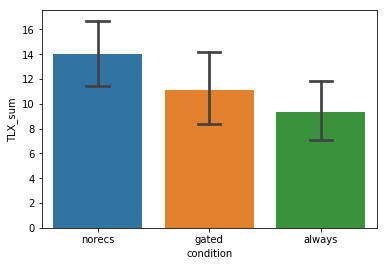

In [58]:
sns.barplot(x='condition', y='TLX_sum', data=block_level_data, capsize=.2)
HTML("The average cognitive load was higher in the no-recommendations condition ({})".format(
    summarize_means(block_level_data, 'condition', 'TLX_sum')))

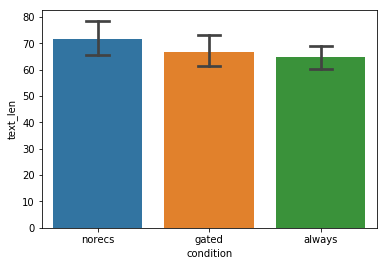

In [59]:
sns.barplot(x='condition', y='text_len', data=trial_level_data, capsize=.2);
HTML("Text length was slightly longer in no-recommendations ({}).".format(
    summarize_means(trial_level_data, 'condition', 'text_len')))

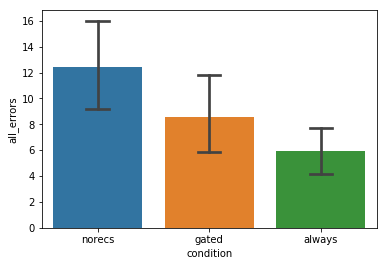

In [60]:
sns.barplot(x='condition', y='all_errors', data=trial_level_data, capsize=.2)
HTML("Participants made more errors (corrected + uncorrected) in the no-recommendations condition ({}).".format(
    summarize_means(trial_level_data, 'condition', 'all_errors')))

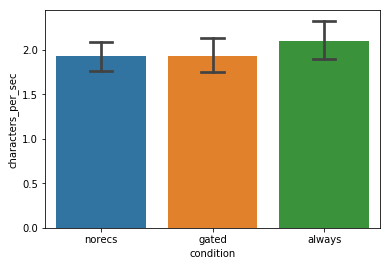

In [61]:
sns.barplot(x='condition', y='characters_per_sec', data=trial_level_data, capsize=.2)
HTML("Participants were slightly faster in the recommendations conditions (characters per second: {}).".format(
    summarize_means(trial_level_data, 'condition', 'characters_per_sec')))

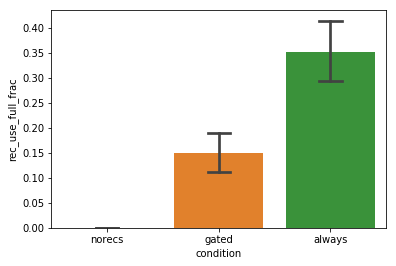

In [57]:
sns.barplot(x='condition', y='rec_use_full_frac', data=trial_level_data, capsize=.2)
HTML("Participants used available recommendations much more often when they were always shown (use rate: {}).".format(
    summarize_means(trial_level_data, 'condition', 'rec_use_full_frac')))

In [17]:
print('\n\n'.join(x for x in experiment_level_data['techDiff'] if x is not None))

No

None

None

No

None

None

None

No

no

No

No

None

No

No

No

No

No


In [20]:
print('\n\n'.join(x for x in experiment_level_data['other'] if isinstance(x, str)))

None

None

None

It went well

None

None

None

All is well

None

None

None

The keys seemed so tiny in all three. It was hard to type. 

None

Great, enjoyed it!

I enjoyed the experience
